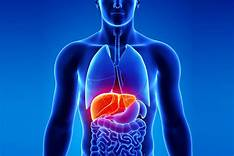

### Problem Statement 

This Machine Learning Challenge requires participants to create predictive models to predict the stage of liver Cirrhosis using 18 clinical features. Cirrhosis damages the liver for a variety of causes leading to scarring and liver failure.
Hepatitis and chronic alcohol abuse are frequent causes of the disease. Liver damage caused by cirrhosis can't be undone, but further damage can be limited. Treatments focus on the underlying cause. In advanced cases, a liver transplant may be required. Predicting the stage of cirrhosis and beginning the treatment before it's too late can prevent the fatal consequences of the disease.

### The Dataset

1) ID: Unique Identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time.

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug. D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: the presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: the presence of spiders N (No) or Y (Yes)

10) Edema: the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [253]:
# some helper function for data analysis
# For Plot Annotation

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [254]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [255]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [256]:
# using floor division to round off the division
train['Age_in_years'] = train['Age'] // 366
test['Age_in_years'] = test['Age'] // 366

In [257]:
test.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age_in_years
0,3870,41,C,Placebo,22553,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6,61
1,3462,1811,C,D-penicillamine,16223,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5,44
2,1632,954,C,D-penicillamine,27100,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3,74
3,722,1969,D,Placebo,17039,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9,46
4,1000,2721,D,D-penicillamine,17738,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6,48


### Explanatory data analysis

In [258]:
print(train.shape)
print(test.shape)

(6800, 21)
(3200, 20)


In [259]:
train[train.dtypes[train.dtypes == 'object'].index].shape

(6800, 7)

In [260]:
train[train.dtypes[train.dtypes == float].index].shape

(6800, 10)

In [261]:
train[train.dtypes[train.dtypes == 'int64'].index].shape

(6800, 4)

In [262]:
train.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
Age_in_years        0
dtype: int64

In the the data we have 7 columns that are character (mainly categorical variable), 10 numeric features and 3 discrete (integer features in the dataset).

### Univariate Analysis on the data

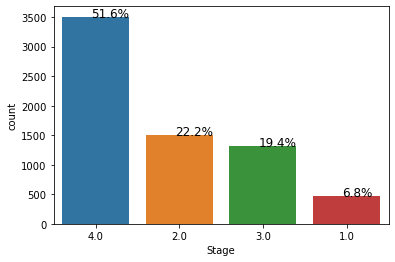

In [263]:
# check the target variable
#plt.figure(figsize=(10,7))
ax = sns.countplot(x='Stage', data=train, order = train['Stage'].value_counts().index)
without_hue(ax, train['Stage'])

most patient in the dataset belong to stage 4.0 and the least with stage 1.0.

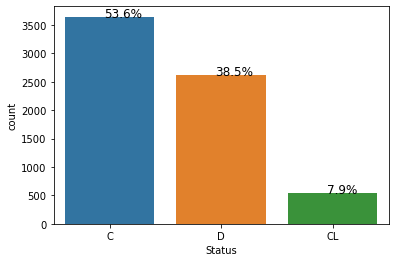

In [264]:
## let check the status of the patient
ax = sns.countplot(x='Status', data=train, order = train['Status'].value_counts().index)
without_hue(ax, train['Status'])

Most of the patients are censored (C) with 53.6%, followed by Death (D) with 38.5% and Censored due to liver tx (C) 7.9%. 

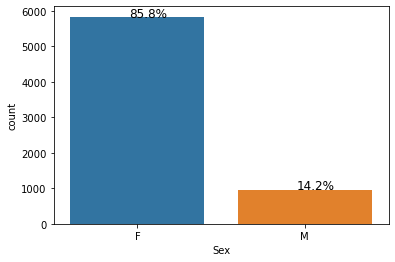

In [265]:
## let check the status of the patient
ax = sns.countplot(x='Sex', data=train, order = train['Sex'].value_counts().index)
without_hue(ax, train['Sex'])

Most Sex in the data set belong to female gender.

Uni-Variate Analysis on the numeric data

In [266]:
train[train.dtypes[train.dtypes == float].index].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


* 'Bilirubin' **Mean** (1.806147), **Median** (0.40) and **Standard Deviation** (3.218009)

* 'Cholesterol' **Mean** (294.575831), **Median** (312.0) and **Standard Deviation** (128.085317)

* 'Albumin' **Mean** (3.036118), **Median** (3.02) and **Standard Deviation** (0.528164)

* 'Copper' **Mean** (68.569121), **Median** (68.0) and **Standard Deviation** (59.637733)

* 'Alk_Phos' **Mean** (1802.951464), **Median** (1563.150) and **Standard Deviation** (1618.550339)

Others can seen in the table above

### Bi varaiate Analysis on the Categorical data 

In this section we are going to explore some features with respect to the target varibale (Stage)

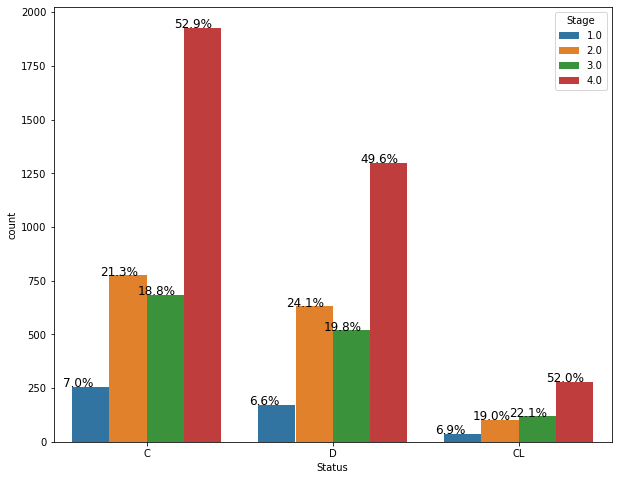

In [267]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Status', data=train,hue='Stage', order = train['Status'].value_counts().index)
with_hue(ax, train['Status'],train['Status'].nunique(), train['Stage'].nunique())

Stage 4 has the most percentage on each status of the patient but with least percentage on the Death Status with 49.6%

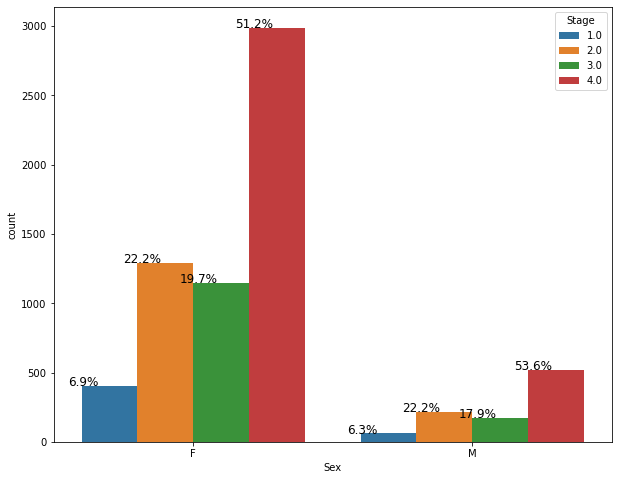

In [268]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Sex', data=train,hue='Stage', order = train['Sex'].value_counts().index)
with_hue(ax, train['Sex'],train['Sex'].nunique(), train['Stage'].nunique())

There is balance in Stages across male and female in the dataset

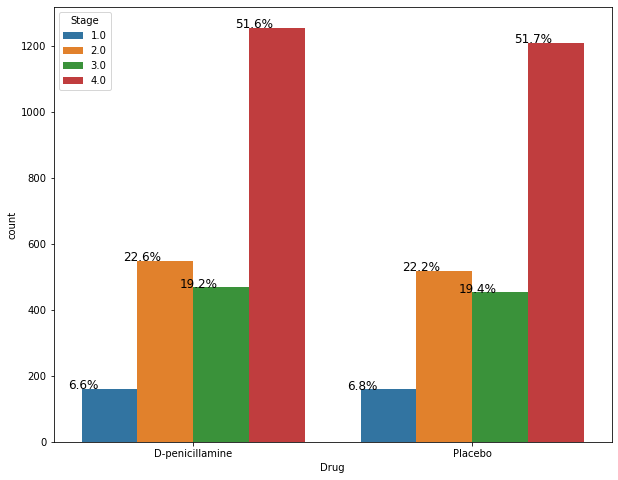

In [269]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Drug', data=train,hue='Stage', order = train['Drug'].value_counts().index)
with_hue(ax, train['Drug'],train['Drug'].nunique(), train['Stage'].nunique())

There is balance in liver stage using both drugs.

### Univariate Analysis on the Numeric data

In this we look at the histogram of the features at a glance.

array([[<AxesSubplot:title={'center':'Bilirubin'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'Albumin'}>],
       [<AxesSubplot:title={'center':'Copper'}>,
        <AxesSubplot:title={'center':'Alk_Phos'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'Tryglicerides'}>,
        <AxesSubplot:title={'center':'Platelets'}>,
        <AxesSubplot:title={'center':'Prothrombin'}>],
       [<AxesSubplot:title={'center':'Stage'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 720x576 with 0 Axes>

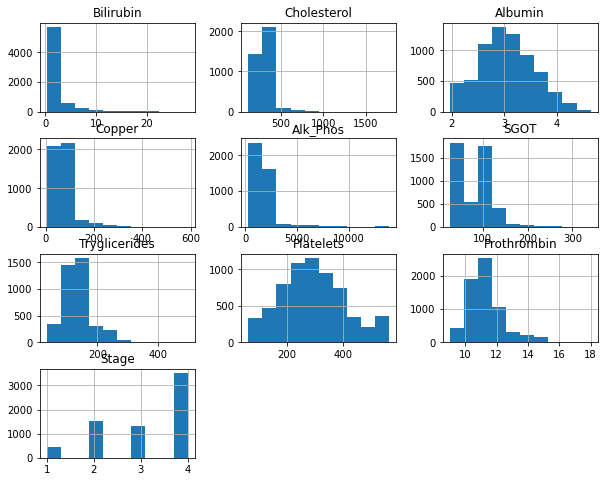

In [207]:
plt.figure(figsize=(10,8))
train[train.dtypes[train.dtypes == float].index].hist(figsize=(10,8))

Most of the numeric features did not follow a normal distribution except the **Albumin** and **Platelets**

#### Bi-Varaiate Analysis on Numerical data

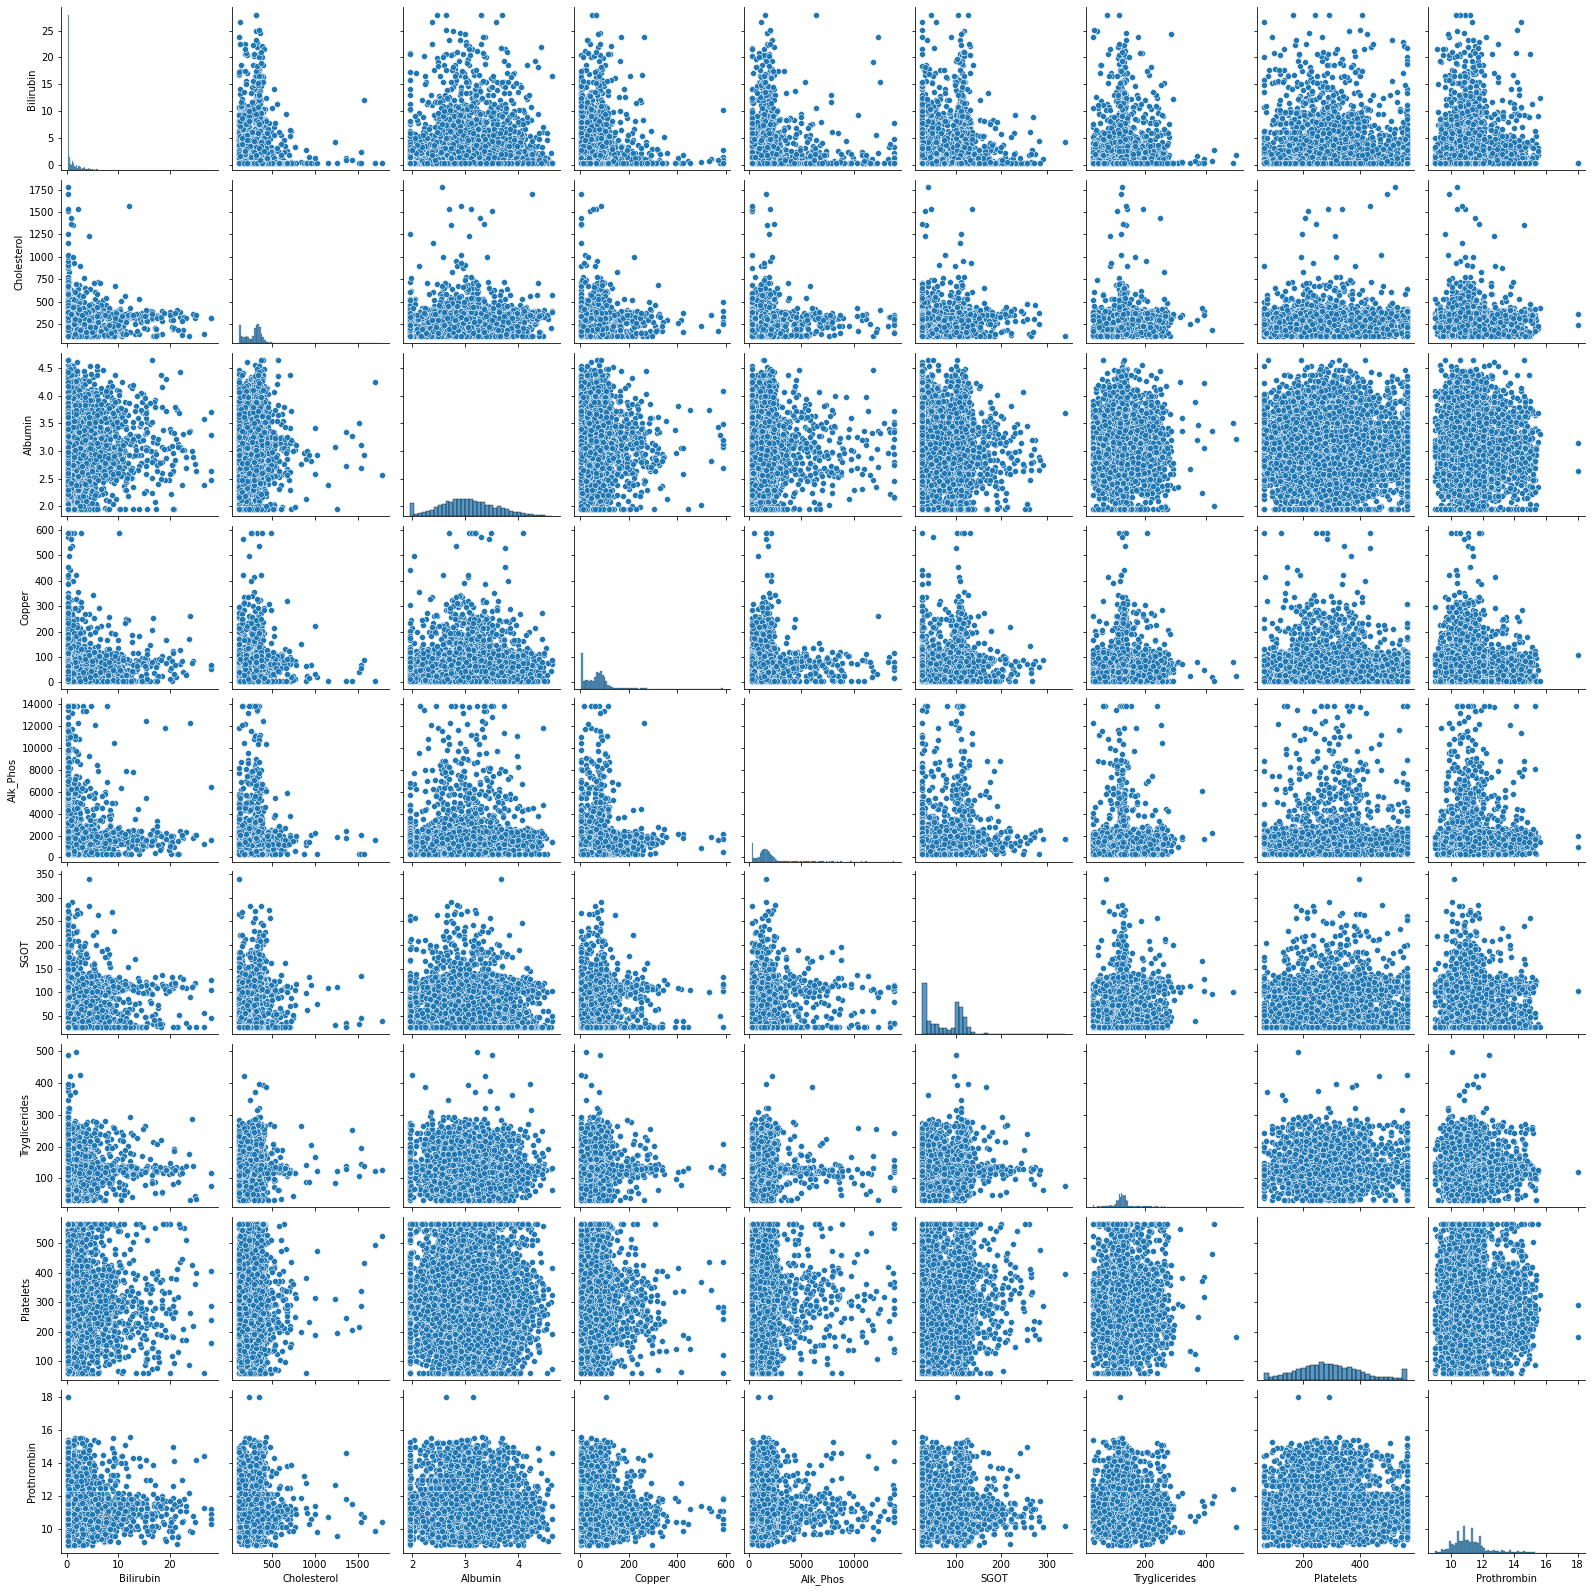

In [208]:
sns.pairplot(train[train.dtypes[train.dtypes == float].index].drop('Stage', axis=1)) # drop the target features

The pairplot the relationship for each numeric variables in the dataset.

#### Diagonistics Analysis

#### predictive analysis of the features

Investigate pair-wise Pearson correlations on the target variable and some other features

In [209]:
# Calculate all correlations in dataframe
corrs = train.corr()

In [210]:
corrs = corrs.sort_values('Stage', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['Stage']) * 100

,Stage
Stage,100.000000
Cholesterol,3.327304
Prothrombin,0.731737
N_Days,0.406623
Alk_Phos,-0.016996
Copper,-0.151756
Age_in_years,-0.177559
Age,-0.185401
Bilirubin,-1.022540
Albumin,-1.512586


No one of the Numeric features have a significant correlation with the **Stage** of the data

It can become more better after we have transformed the categorical features

<AxesSubplot:xlabel='Age_in_years', ylabel='Cholesterol'>

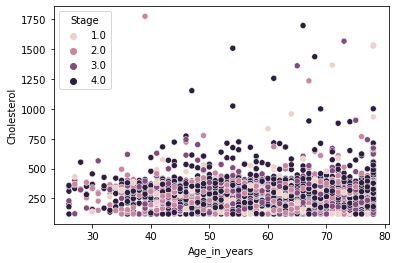

In [211]:
sns.scatterplot(y='Cholesterol', x='Age_in_years', hue='Stage', data=train)

We observe from the data that that most of the stage falls within the range of 120 cholestrol to 500 no matter the Age.

Major observation there is an extreme outlier with **Age** 40 and **Cholostrol** 1750 belongs to stage 1

there is an extreme outlier with **Age** 65 and **Cholostrol** 1650 belongs to stage 4

<AxesSubplot:xlabel='Albumin', ylabel='Copper'>

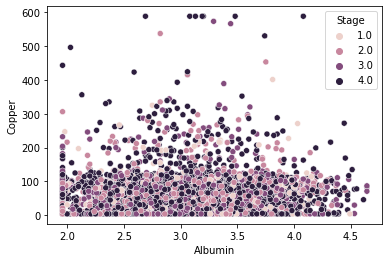

In [212]:
sns.scatterplot(y='Copper', x='Albumin', hue='Stage', data=train)

Most Outliers are from Stage 4 

### Dealing with missing values

Ideally when dealing with missing values we can remove all the rows or columns with missing value but most times this makes to lose a lot of information from the data.

Finally the missing with statistically with mean, median or mode can increase the bias in the dataset.

Is there a better way to fill the missing, No.

we are going to experiment some few methods and pick the best, and some models also handle missing values.

In [213]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0,53
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,...,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0,62
2,7254,297,D,NaN,27957,F,N,N,NaN,N,...,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0,76
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,...,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0,57
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,...,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0,49


In [214]:
train['Drug'].value_counts()

D-penicillamine    2434
Placebo            2341
Name: Drug, dtype: int64

Placebo drug are not real drugs but seems so and D-penicillamine which is mainly used for liver treatment

In [215]:
pd.crosstab(train['Drug'], train['Status'])

Status,C,CL,D
Drug,,,
D-penicillamine,1303,203,928
Placebo,1237,184,920


In [216]:
train['Drug'].fillna(method='ffill').value_counts()

D-penicillamine    3494
Placebo            3306
Name: Drug, dtype: int64

In [217]:
train['Drug'] = train['Drug'].fillna(method='ffill')
test['Drug'] = test['Drug'].fillna(method='ffill')

Ascites is the abnormal build-up of fluid in the abdomen

Filling the Categorical missing value with ffill with help to reduce the bias in the categorical features distribution.

In [218]:
cat_col = train[train.dtypes[train.dtypes == 'object'].index].columns

In [219]:
for col_cat in cat_col:
    train[col_cat] = train[col_cat].fillna(method='ffill')
    test[col_cat] = test[col_cat].fillna(method='ffill')

## performing data cleaning on the Numeric data

In [220]:
train[train.dtypes[train.dtypes == float].index].describe()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


According to research about cholestrol the normal levels are differs with age and sex.

The sex and Age are without missing values but we have to convert the age in days to years.

Creating Age_in_years is part of feature engineering process

In [221]:
# using floor division to round off the division
train['Age_in_years'] = train['Age'] // 366
test['Age_in_years'] = test['Age'] // 366

In [222]:
# cleaning cholostrol in the dataset
asc_train = train.groupby(['Age_in_years', 'Sex'])['Cholesterol'].median()
asc_test = train.groupby(['Age_in_years', 'Sex'])['Cholesterol'].median()

In [223]:
train = train.merge(asc_train, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Cholesterol'] = train['Cholesterol'].fillna(train.pop('Cholesterol_'))
train['Cholesterol'] = train['Cholesterol'].fillna(value=0.0)

In [224]:
test = test.merge(asc_test, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Cholesterol'] = test['Cholesterol'].fillna(test.pop('Cholesterol_'))

In [225]:
train['Copper'].describe()

count    4644.000000
mean       68.569121
std        59.637733
min         4.000000
25%        26.000000
50%        68.000000
75%        91.000000
max       588.000000
Name: Copper, dtype: float64

In [226]:
train.dtypes[train.dtypes == float].index

Index(['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

### Filling the missing value

According to domain research it is noted that age and sex have significant meaning on the type of metabolism our body required.

In [227]:
# cleaning copper in the dataset
asc_train_copper = train.groupby(['Age_in_years', 'Sex'])['Copper'].median()
asc_test_copper = train.groupby(['Age_in_years', 'Sex'])['Copper'].median()
## Alk_Phos
asc_train_Alk_Phos = train.groupby(['Age_in_years', 'Sex'])['Alk_Phos'].median()
asc_test_Alk_Phos = train.groupby(['Age_in_years', 'Sex'])['Alk_Phos'].median()
## 'SGOT'
asc_train_SGOT = train.groupby(['Age_in_years', 'Sex'])['SGOT'].median()
asc_test_SGOT = train.groupby(['Age_in_years', 'Sex'])['SGOT'].median()
## Tryglicerides
asc_train_Tryglicerides = train.groupby(['Age_in_years', 'Sex'])['Tryglicerides'].median()
asc_test_Tryglicerides = train.groupby(['Age_in_years', 'Sex'])['Tryglicerides'].median()
## Platelets
asc_train_Platelets = train.groupby(['Age_in_years', 'Sex'])['Platelets'].median()
asc_test_Platelets = train.groupby(['Age_in_years', 'Sex'])['Platelets'].median()
## Prothrombin
asc_train_Prothrombin = train.groupby(['Age_in_years', 'Sex'])['Prothrombin'].median()
asc_test_Prothrombin = train.groupby(['Age_in_years', 'Sex'])['Prothrombin'].median()

### Merging with the data

In [228]:
train = train.merge(asc_train_copper, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Copper'] = train['Copper'].fillna(train.pop('Copper_'))

test = test.merge(asc_train_copper, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Copper'] = test['Copper'].fillna(test.pop('Copper_'))

In [229]:
train = train.merge(asc_train_Alk_Phos, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Alk_Phos'] = train['Alk_Phos'].fillna(train.pop('Alk_Phos_'))

test = test.merge(asc_train_Alk_Phos, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Alk_Phos'] = test['Alk_Phos'].fillna(test.pop('Alk_Phos_'))

In [230]:
train = train.merge(asc_train_SGOT, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['SGOT'] = train['SGOT'].fillna(train.pop('SGOT_'))

test = test.merge(asc_train_SGOT, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['SGOT'] = test['SGOT'].fillna(test.pop('SGOT_'))

In [231]:
train = train.merge(asc_train_Tryglicerides, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Tryglicerides'] = train['Tryglicerides'].fillna(train.pop('Tryglicerides_'))

test = test.merge(asc_train_Tryglicerides, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Tryglicerides'] = test['Tryglicerides'].fillna(test.pop('Tryglicerides_'))

In [232]:
train = train.merge(asc_train_Platelets, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Platelets'] = train['Platelets'].fillna(train.pop('Platelets_'))

test = test.merge(asc_train_Platelets, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Platelets'] = test['Platelets'].fillna(test.pop('Platelets_'))

In [233]:
train = train.merge(asc_train_Prothrombin, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
train['Prothrombin'] = train['Prothrombin'].fillna(train.pop('Prothrombin_'))

test = test.merge(asc_train_Prothrombin, on=['Age_in_years', 'Sex'], how='left', suffixes=('','_'))
test['Prothrombin'] = test['Prothrombin'].fillna(test.pop('Prothrombin_'))

In [234]:
### OTHER MISSING VALUE WITH 0
train = train.fillna(value=0.0)
test = test.fillna(value=0.0)

In [235]:
test.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Age_in_years     0
dtype: int64

### Data Transformation

Most machine learning model can not work with categorical data in a text form.

We encode most of the categorical features using Ordinal Enconding because most of them have meaningful ranking in the data set and Nominal encoding for feature without meaningful ranking.

In [236]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,...,279.0,2.96,84.0,1500.8,99.430,109.0,293.0,10.2,4.0,53
1,7326,41,C,D-penicillamine,22880,F,N,N,Y,N,...,318.0,2.96,68.0,1835.4,26.350,131.0,308.0,10.8,1.0,62
2,7254,297,D,D-penicillamine,27957,F,N,N,Y,N,...,328.0,2.64,4.0,1591.6,102.105,116.0,194.0,10.3,3.0,76
3,3135,1872,C,D-penicillamine,21111,F,N,Y,Y,N,...,302.0,2.02,49.0,1520.9,26.350,125.0,259.5,10.5,4.0,57
4,2483,939,CL,D-penicillamine,18061,F,N,Y,Y,N,...,344.0,3.11,91.0,1598.1,104.560,126.0,306.0,11.4,2.0,49


In [237]:
cat_col

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

We replace the data using ordinal encoding i.e 2>1>0.

In health care it is better to fill No disease to be have more preference than Yes disease.

In [238]:
clean_status = {'C':2, 'CL':1, 'D':0}
clean_drug = {'D-penicillamine':1, 'Placebo':0}
clean_edema = {'N':2, 'S':1, 'Y':0}
clean_AHS = {'N':1, 'Y':0}

In [239]:
train['Status'] = train['Status'].map(clean_status)
test['Status'] = test['Status'].map(clean_status)

In [240]:
train['Drug'] = train['Drug'].map(clean_drug)
test['Drug'] = test['Drug'].map(clean_drug)

In [241]:
train['Edema'].value_counts()

N    5326
S    1023
Y     451
Name: Edema, dtype: int64

In [242]:
train['Edema'] = train['Edema'].map(clean_edema)
test['Edema'] = test['Edema'].map(clean_edema)

In [243]:
for r_cat_col in ['Ascites', 'Hepatomegaly', 'Spiders']:
    train[r_cat_col] = train[r_cat_col].map(clean_AHS)
    test[r_cat_col] = test[r_cat_col].map(clean_AHS)

In [244]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
0,7135,1654,1,1,19581,F,1,1,0,2,...,279.0,2.96,84.0,1500.8,99.430,109.0,293.0,10.2,4.0,53
1,7326,41,2,1,22880,F,1,1,0,2,...,318.0,2.96,68.0,1835.4,26.350,131.0,308.0,10.8,1.0,62
2,7254,297,0,1,27957,F,1,1,0,2,...,328.0,2.64,4.0,1591.6,102.105,116.0,194.0,10.3,3.0,76
3,3135,1872,2,1,21111,F,1,0,0,2,...,302.0,2.02,49.0,1520.9,26.350,125.0,259.5,10.5,4.0,57
4,2483,939,1,1,18061,F,1,0,0,2,...,344.0,3.11,91.0,1598.1,104.560,126.0,306.0,11.4,2.0,49


In [245]:
## one hot encode the sex
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

### Diagonistics Analysis on the data 2 

In [246]:
# Calculate all correlations in dataframe
corrs = train.corr()

In [247]:
corrs = corrs.sort_values('Stage', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['Stage'].head(11)) * 100

,Stage
Stage,100.000000
Status,2.438055
Cholesterol,1.983687
Sex_M,1.243328
Ascites,1.074783
Drug,0.762184
Spiders,0.694614
Prothrombin,0.684840
N_Days,0.406623
Copper,-0.073381


Out of the Top 10 features correlation of the target variable **Stage**, we have 6 categorical features why 4 dominated the top and 4 numeric features. The highest correlation is less than 5% with the target varible.

From assumption most of the features are non-linear to the target features.

Text(0.5, 1.0, 'correlation plot for the data')

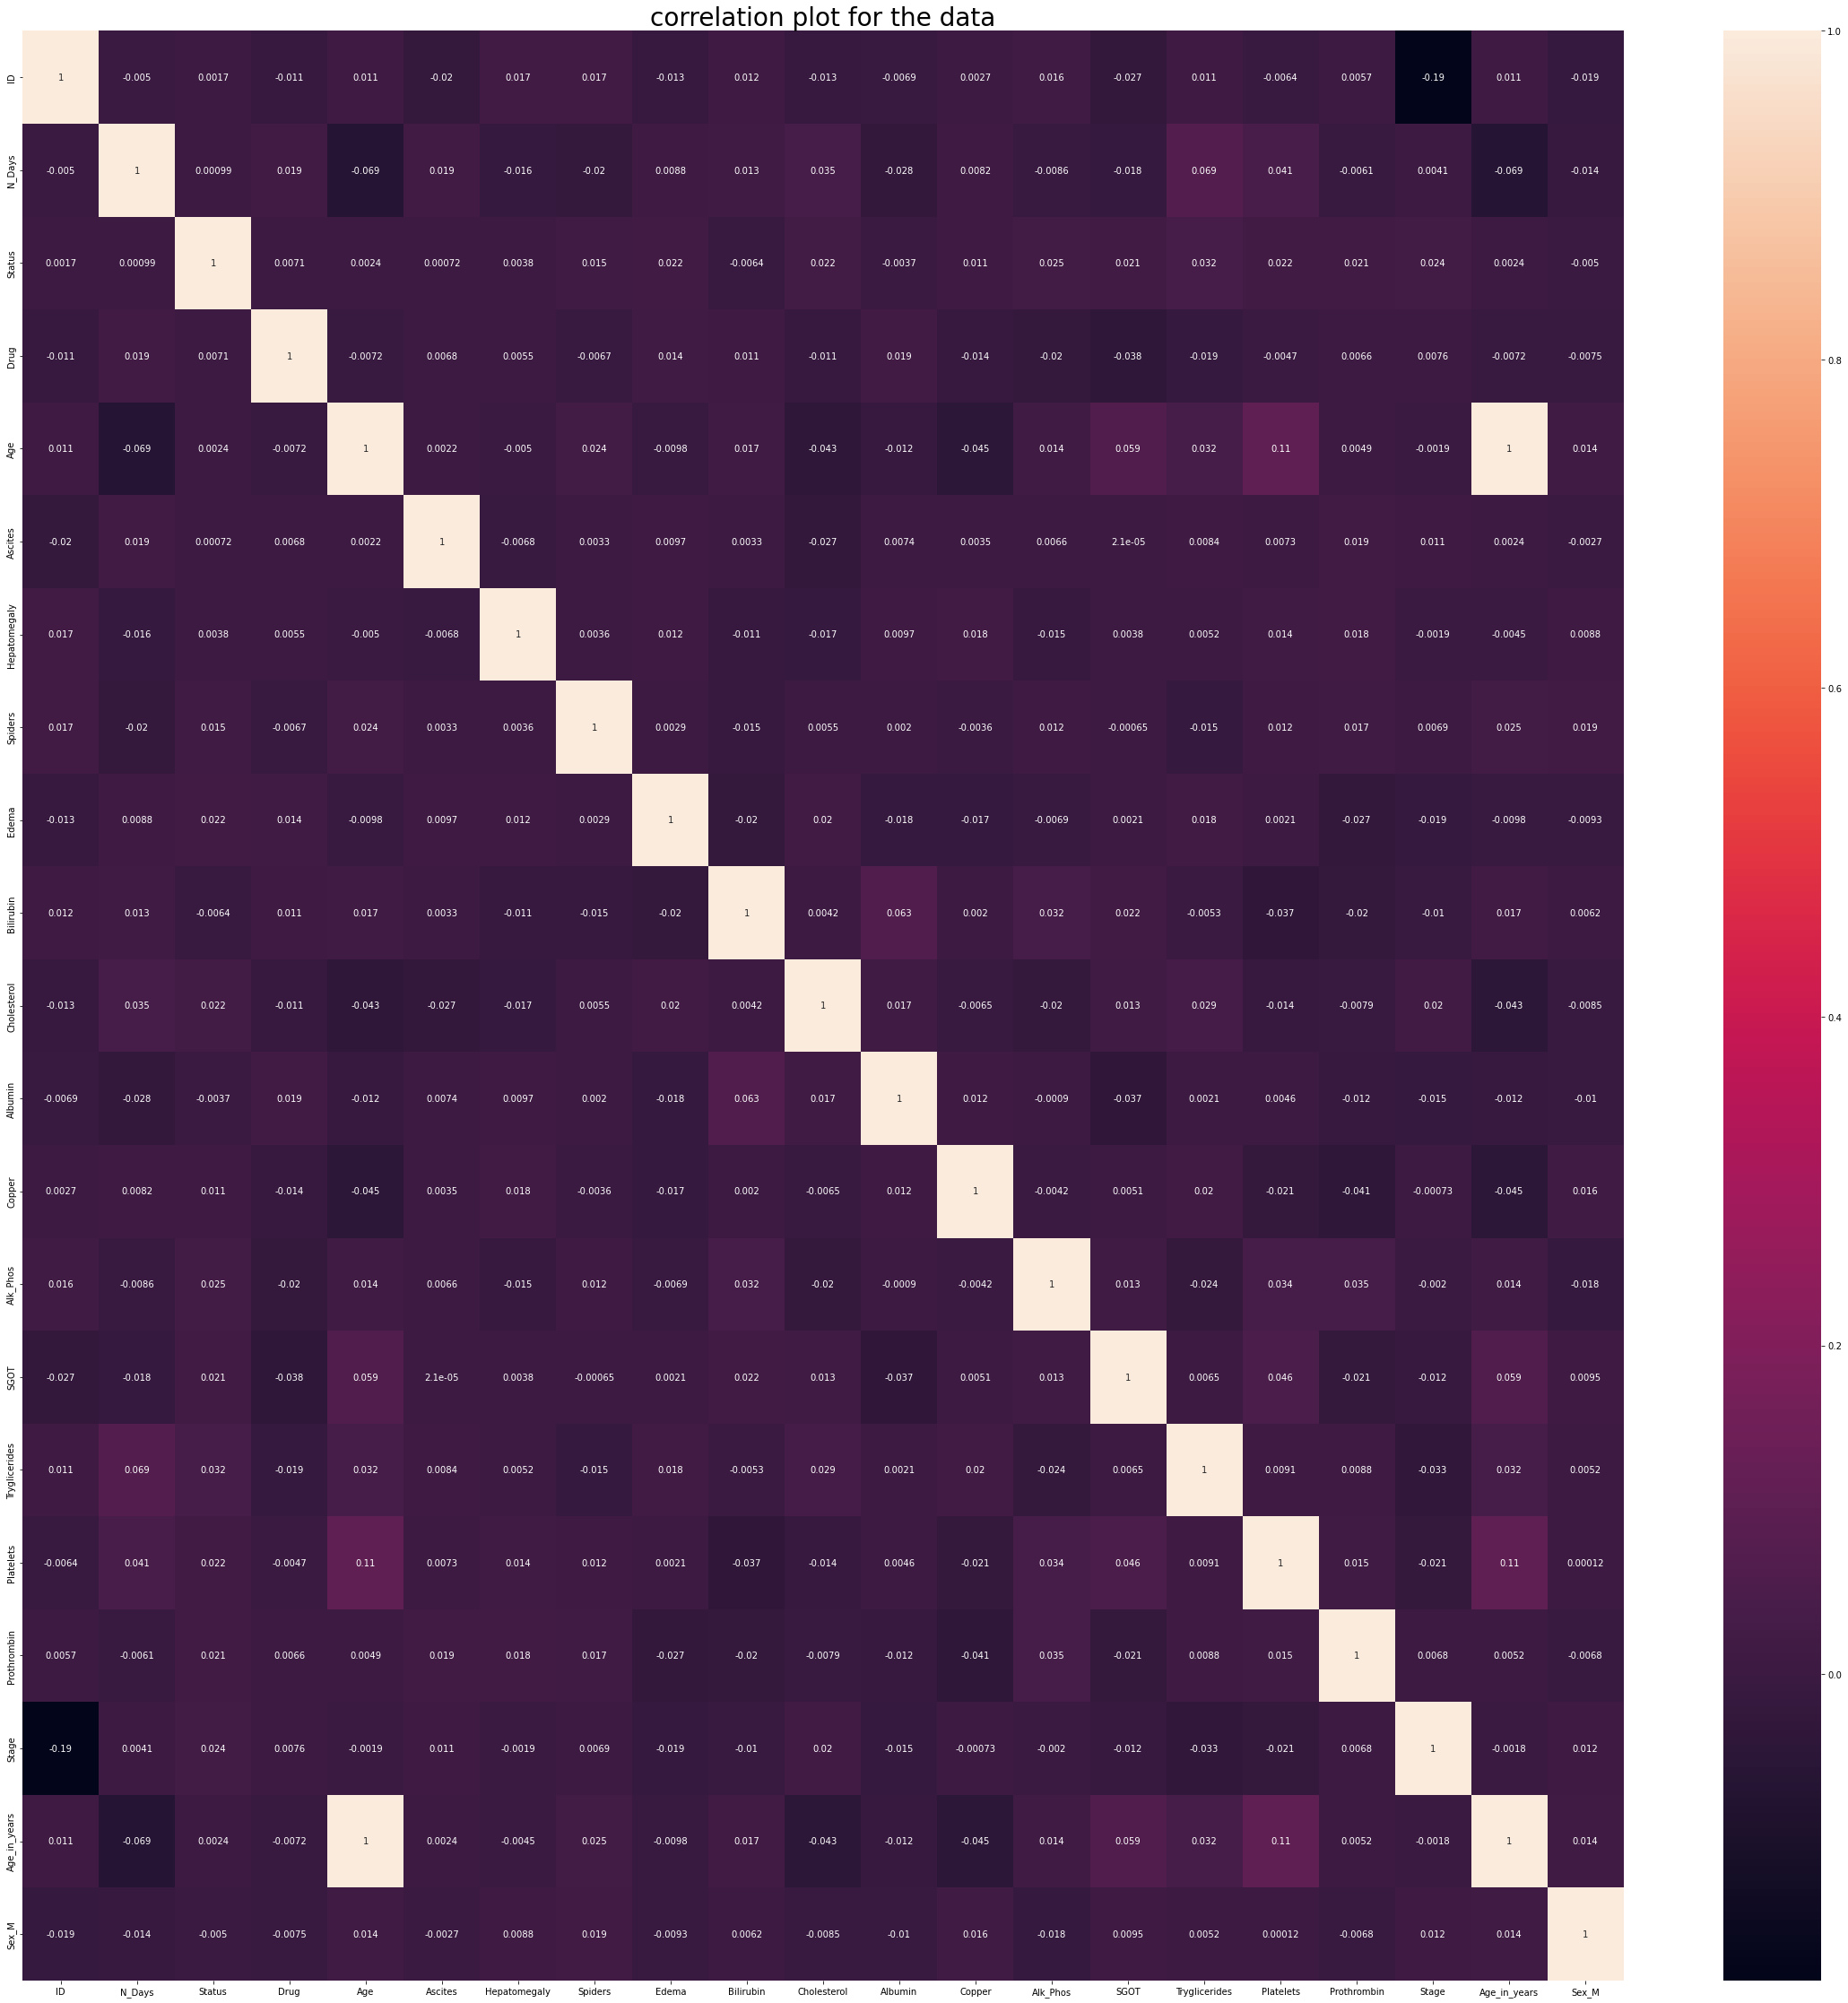

In [248]:
# correlation analysis
plt.figure(figsize=(40,40))
corr = train.corr()
sns.heatmap(corr,annot=True)
plt.title("correlation plot for the data",size=28)

There is a redundant correlation and for this reason we are dropping our generated feature. **Age_In_Years**

In [249]:
train = train.drop('Age_in_years', axis=1)
test = test.drop('Age_in_years', axis=1)

In [250]:
test.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Ascites          0
Hepatomegaly     1
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Sex_M            0
dtype: int64

In [251]:
# export the data for modelling phase

train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)